In [47]:
samples = map(lambda x: x.strip('\r\n'), open('./samples/call_samples.txt', 'r').readlines())
#print samples

In [48]:
eg3sizes = map(lambda i: i.strip('\n').split(': ')[-1], open('./logs/call_eg3size.log').readlines())
#print eg3sizes

In [49]:
import pandas as pd
user_data = pd.read_csv('/home/sysadmin/zhicongchen/DataSets/phone_data/tb_user_info_201202.csv')

In [50]:
#samples = samples[:100]
#eg3sizes = eg3sizes[:100]
N = len(samples)
user_data = user_data.fillna(0)
ages =  map(lambda x: user_data.AGE[user_data.ACC_NBR == int(samples[x])].tolist()[0], range(N))
#print ages

In [51]:
user_data = user_data.fillna(0)
consume_amt =  map(lambda x: user_data.CONSUME_AMT[user_data.ACC_NBR == int(samples[x])].tolist()[0], range(N))
#print consume_amt

In [52]:
user_data = user_data.fillna(0)
terminal_price =  map(lambda x: user_data.TERMINAL_PRICE[user_data.ACC_NBR == int(samples[x])].tolist()[0], range(N))
#print terminal_price

(array([ 107.,    3.,  136.,  261.,  207.,  175.,   47.,   37.,   16.,   11.]),
 array([  0. ,   8.5,  17. ,  25.5,  34. ,  42.5,  51. ,  59.5,  68. ,
         76.5,  85. ]),
 <a list of 10 Patch objects>)

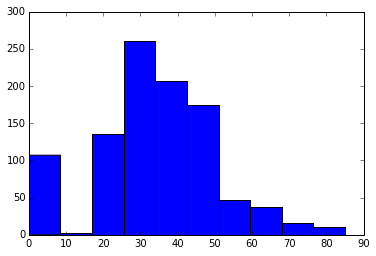

In [53]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.hist(ages)

(array([ 586.,   51.,   23.,   29.,   79.,    8.,    6.,  162.,   44.,   12.]),
 array([  2.00000000e+00,   3.88289200e+05,   7.76576400e+05,
          1.16486360e+06,   1.55315080e+06,   1.94143800e+06,
          2.32972520e+06,   2.71801240e+06,   3.10629960e+06,
          3.49458680e+06,   3.88287400e+06]),
 <a list of 10 Patch objects>)

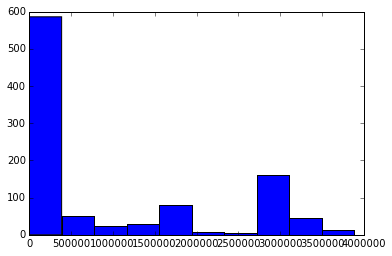

In [54]:
plt.hist(map(lambda i: int(i), eg3sizes))

(array([ 740.,  200.,   35.,   10.,    7.,    2.,    3.,    1.,    1.,    1.]),
 array([ -10. ,   50.4,  110.8,  171.2,  231.6,  292. ,  352.4,  412.8,
         473.2,  533.6,  594. ]),
 <a list of 10 Patch objects>)

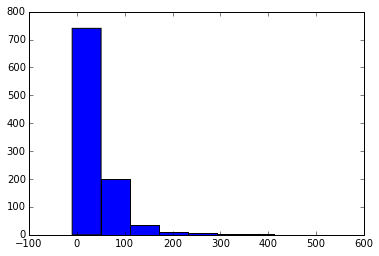

In [55]:
plt.hist(map(lambda i: int(i), consume_amt))

(array([ 868.,   66.,   25.,    9.,   14.,    5.,    1.,    0.,    0.,   12.]),
 array([    0.,   400.,   800.,  1200.,  1600.,  2000.,  2400.,  2800.,
         3200.,  3600.,  4000.]),
 <a list of 10 Patch objects>)

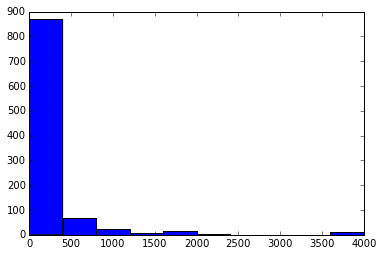

In [56]:
plt.hist(map(lambda i: int(i), terminal_price))

#Linear Regression

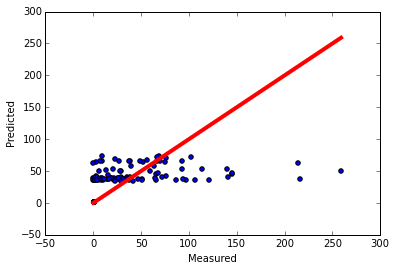

In [40]:
from sklearn.cross_validation import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

lr = linear_model.LinearRegression()
#X = np.array(map(lambda i,j: [int(i),int(j)], eg3sizes, consume_amt))
X = np.array(map(lambda i: int(i), eg3sizes))
y = np.array(map(lambda i: int(i), consume_amt))

X = np.array(map(lambda x: (int(x),1), X))
y = np.array(map(lambda x: (int(x),1), y))

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validated:
predicted = cross_val_predict(lr, X, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'r-', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
#plt.xscale('log')
#plt.yscale('log')
plt.show()

('Coefficients: \n', array([[  7.22211594e-06,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00]]))
Residual sum of squares: 389.10
Variance score: 0.08


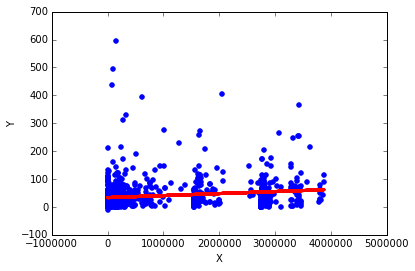

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

# Load the diabetes dataset
X = np.array(map(lambda i: int(i), eg3sizes))
y = np.array(map(lambda i: int(i), consume_amt))

X = np.array(map(lambda x: (int(x),1), X))
y = np.array(map(lambda x: (int(x),1), y))


# Use only one feature
diabetes_X = X

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = y[:-20]
diabetes_y_test = y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(diabetes_X_test, diabetes_y_test))

# Plot outputs
#plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.scatter(X, y, color='blue')
plt.plot(X, regr.predict(X), color='red',
         linewidth=3)

plt.xlabel('X')
plt.ylabel('Y')

plt.show()

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
import matplotlib
matplotlib.rc("savefig", dpi=150)

path = './pictures/'

for i in range(10):
    sample = samples[i*100:(i+1)*100]
    eg3size = eg3sizes[i*100:(i+1)*100]
    
    N = len(sample)
    user_data = user_data.fillna(0)
    consume_amt =  map(lambda x: user_data.CONSUME_AMT[user_data.ACC_NBR == int(sample[x])].tolist()[0], range(N))
    #print consume_amt

    # Load the diabetes dataset
    X = np.array(map(lambda i: int(i), eg3size))
    y = np.array(map(lambda i: int(i), consume_amt))

    X = np.array(map(lambda x: (int(x),1), X))
    y = np.array(map(lambda x: (int(x),1), y))


    # Use only one feature
    diabetes_X = X

    # Split the data into training/testing sets
    diabetes_X_train = diabetes_X[:-20]
    diabetes_X_test = diabetes_X[-20:]

    # Split the targets into training/testing sets
    diabetes_y_train = y[:-20]
    diabetes_y_test = y[-20:]

    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(diabetes_X_train, diabetes_y_train)

    # The coefficients
    print('Coefficients: \n', regr.coef_)
    # The mean square error
    print("Residual sum of squares: %.2f"
          % np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % regr.score(diabetes_X_test, diabetes_y_test))

    # Plot outputs
    #plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
    plt.scatter(X, y, color='blue')
    plt.plot(X, regr.predict(X), color='red',
             linewidth=3)

    plt.xlabel('X')
    plt.ylabel('Y')

    plt.savefig(path + 'MyFig' + str(i) + '.jpg') 
    plt.close()

('Coefficients: \n', array([[  1.15753404e-05,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00]]))
Residual sum of squares: 1371.10
Variance score: -0.09
('Coefficients: \n', array([[  2.79802319e-06,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00]]))
Residual sum of squares: 966.49
Variance score: -0.03
('Coefficients: \n', array([[  1.09851665e-05,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00]]))
Residual sum of squares: 438.37
Variance score: -0.07
('Coefficients: \n', array([[  1.37569361e-05,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00]]))
Residual sum of squares: 349.66
Variance score: -1.14
('Coefficients: \n', array([[  3.54913186e-06,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00]]))
Residual sum of squares: 547.18
Variance score: -0.07
('Coefficients: \n', array([[  1.20109361e-05,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00]]))
Residual sum of squares: 817.82
Variance score: -3.

#SVR

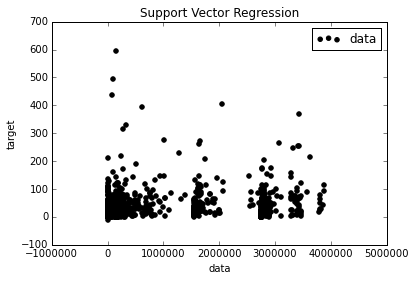

In [15]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
%matplotlib inline

###############################################################################
# Generate sample data
X = np.array(map(lambda x: [x], eg3sizes))
y = np.array(consume_amt)

#X = np.array(map(lambda i: int(i), eg3sizes))
#y = np.array(map(lambda i: int(i), consume_amt))

###############################################################################
# Add noise to targets
# y[::5] += 3 * (0.5 - np.random.rand(8))

###############################################################################
# Fit regression model
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
#svr_lin = SVR(kernel='linear', C=1e3)
#svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(X, y).predict(X)
#y_lin = svr_lin.fit(X, y).predict(X)
#y_poly = svr_poly.fit(X, y).predict(X)

###############################################################################
# look at the results
plt.scatter(X, y, c='k', label='data')
plt.hold('on')
#plt.plot(X, y_rbf, c='g', label='RBF model')
#plt.plot(X, y_lin, c='r', label='Linear model')
#plt.plot(X, y_poly, c='b', label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()